In [1]:
import pandas as pd
import numpy as np
# librairies pour des statistiques et visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv("hackathon_data1.csv")
data

,model_name,total_duration,prompt_token_length,response_token_length,response_duration,energy_consumption_llm_total,word_count,reading_time,hardware
0,codellama,4.628405e+10,50.0,2042.0,4.054072e+10,0.000952,22.0,1.59,laptop2
1,codellama,3.852480e+09,55.0,201.0,3.656570e+09,0.000095,34.0,1.98,laptop2
2,codellama,9.366900e+09,35.0,493.0,9.177037e+09,0.000219,26.0,1.98,laptop2
3,codellama,4.695541e+09,97.0,242.0,4.447986e+09,0.000114,70.0,3.55,laptop2
4,codellama,6.369055e+09,34.0,338.0,6.172479e+09,0.000152,27.0,1.94,laptop2
...,...,...,...,...,...,...,...,...,...
78420,gemma:7b,4.751415e+08,34.0,11.0,2.261950e+08,0.000017,29.0,1.67,laptop2
78421,gemma:7b,1.738086e+09,26.0,65.0,1.476192e+09,0.000045,21.0,1.42,laptop2
78422,gemma:7b,1.428237e+09,28.0,53.0,1.200718e+09,0.000039,24.0,1.37,laptop2
78423,gemma:7b,6.182330e+08,47.0,17.0,3.626740e+08,0.000020,37.0,1.70,laptop2


In [3]:
# citer chaque valeurs distinctes dans la colonne "model_name"
distinct_models = data["model_name"].unique()
distinct_models

array(['codellama', 'gemma:2b', 'gemma:7b', 'llama3:70b', 'codellama:70b',
       'codellama:7b', 'llama3'], dtype=object)

In [4]:
# dans la colonne "model_name", changer "codellama" en "codellama:7b"
data["model_name"] = data["model_name"].replace("codellama", "codellama:7b")
# dans la colonne "model_name", changer "llama3" en "llama3:8b"
data["model_name"] = data["model_name"].replace("llama3", "llama3:8b")

In [5]:
distinct_models = data["model_name"].unique()
distinct_models

array(['codellama:7b', 'gemma:2b', 'gemma:7b', 'llama3:70b',
       'codellama:70b', 'llama3:8b'], dtype=object)

In [6]:
data[["model_base", "model_size"]] = data["model_name"].str.split(":", expand=True)
data["model_size"] = data["model_size"].str.replace("b", "", case=False).astype(float)
data

,model_name,total_duration,prompt_token_length,response_token_length,response_duration,energy_consumption_llm_total,word_count,reading_time,hardware,model_base,model_size
0,codellama:7b,4.628405e+10,50.0,2042.0,4.054072e+10,0.000952,22.0,1.59,laptop2,codellama,7.0
1,codellama:7b,3.852480e+09,55.0,201.0,3.656570e+09,0.000095,34.0,1.98,laptop2,codellama,7.0
2,codellama:7b,9.366900e+09,35.0,493.0,9.177037e+09,0.000219,26.0,1.98,laptop2,codellama,7.0
3,codellama:7b,4.695541e+09,97.0,242.0,4.447986e+09,0.000114,70.0,3.55,laptop2,codellama,7.0
4,codellama:7b,6.369055e+09,34.0,338.0,6.172479e+09,0.000152,27.0,1.94,laptop2,codellama,7.0
...,...,...,...,...,...,...,...,...,...,...,...
78420,gemma:7b,4.751415e+08,34.0,11.0,2.261950e+08,0.000017,29.0,1.67,laptop2,gemma,7.0
78421,gemma:7b,1.738086e+09,26.0,65.0,1.476192e+09,0.000045,21.0,1.42,laptop2,gemma,7.0
78422,gemma:7b,1.428237e+09,28.0,53.0,1.200718e+09,0.000039,24.0,1.37,laptop2,gemma,7.0
78423,gemma:7b,6.182330e+08,47.0,17.0,3.626740e+08,0.000020,37.0,1.70,laptop2,gemma,7.0


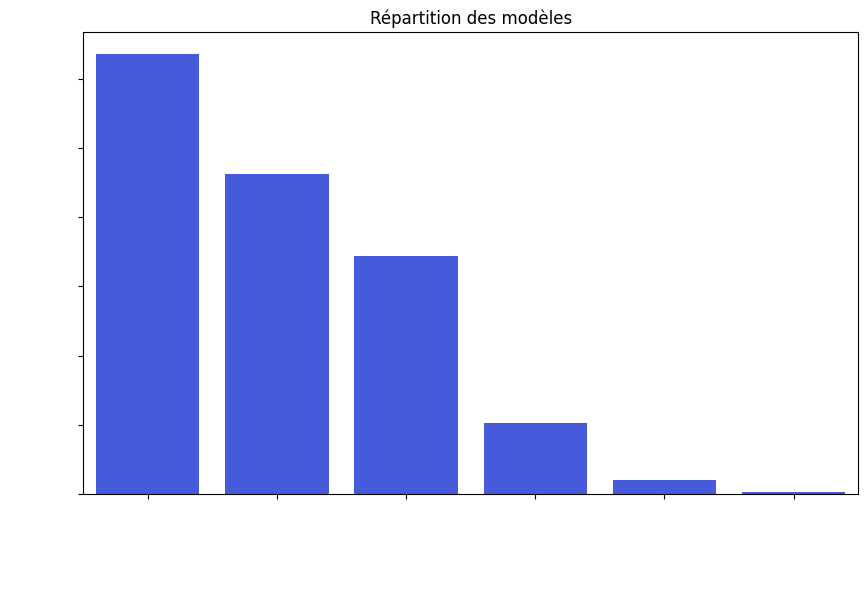

In [7]:
# afficher la quantité de chaque modèle dans un graphique en barres
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.countplot(data=data, x="model_name", order=data["model_name"].value_counts().index, color="#2d4af3")
plt.title("Répartition des modèles")
plt.xlabel("Modèle", color="white")
plt.ylabel("Quantité", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.show()


In [8]:
# statistiques descriptives de la colonne "model_name" avec data catégorielle en string
model_stats = data["model_name"].describe()
model_stats



count        78425
unique           6
top       gemma:2b
freq         31798
Name: model_name, dtype: object

In [9]:
data

,model_name,total_duration,prompt_token_length,response_token_length,response_duration,energy_consumption_llm_total,word_count,reading_time,hardware,model_base,model_size
0,codellama:7b,4.628405e+10,50.0,2042.0,4.054072e+10,0.000952,22.0,1.59,laptop2,codellama,NaN
1,codellama:7b,3.852480e+09,55.0,201.0,3.656570e+09,0.000095,34.0,1.98,laptop2,codellama,NaN
2,codellama:7b,9.366900e+09,35.0,493.0,9.177037e+09,0.000219,26.0,1.98,laptop2,codellama,NaN
3,codellama:7b,4.695541e+09,97.0,242.0,4.447986e+09,0.000114,70.0,3.55,laptop2,codellama,NaN
4,codellama:7b,6.369055e+09,34.0,338.0,6.172479e+09,0.000152,27.0,1.94,laptop2,codellama,NaN
...,...,...,...,...,...,...,...,...,...,...,...
78420,gemma:7b,4.751415e+08,34.0,11.0,2.261950e+08,0.000017,29.0,1.67,laptop2,gemma,7.0
78421,gemma:7b,1.738086e+09,26.0,65.0,1.476192e+09,0.000045,21.0,1.42,laptop2,gemma,7.0
78422,gemma:7b,1.428237e+09,28.0,53.0,1.200718e+09,0.000039,24.0,1.37,laptop2,gemma,7.0
78423,gemma:7b,6.182330e+08,47.0,17.0,3.626740e+08,0.000020,37.0,1.70,laptop2,gemma,7.0


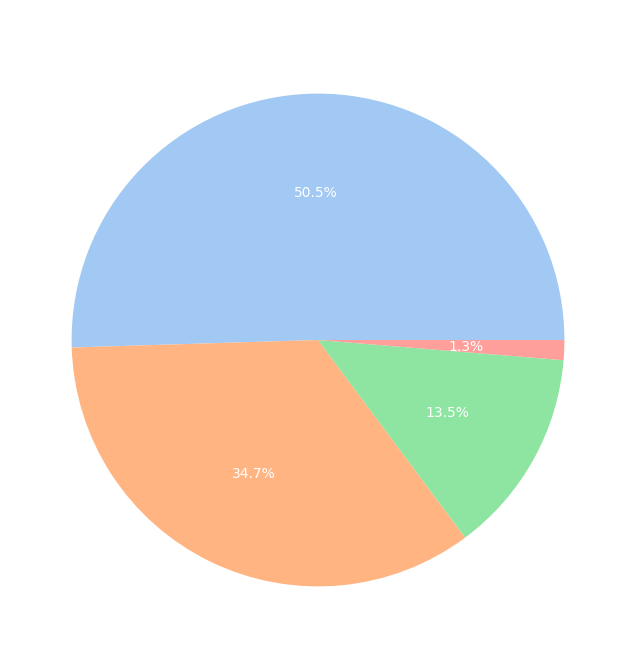

count           78425
unique              4
top       workstation
freq            39593
Name: hardware, dtype: object

In [10]:
# diagramme circulaire de la répartition des devices utilisés dans la colonne "hardware"
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
data["hardware"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"), textprops={"color":"white"})
plt.title("Répartition des devices utilisés", color="white")
plt.ylabel("")
plt.show()

# statistiques descriptives de la colonne "hardware"
hardware_stats = data["hardware"].describe()
hardware_stats


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21152\1460969601.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


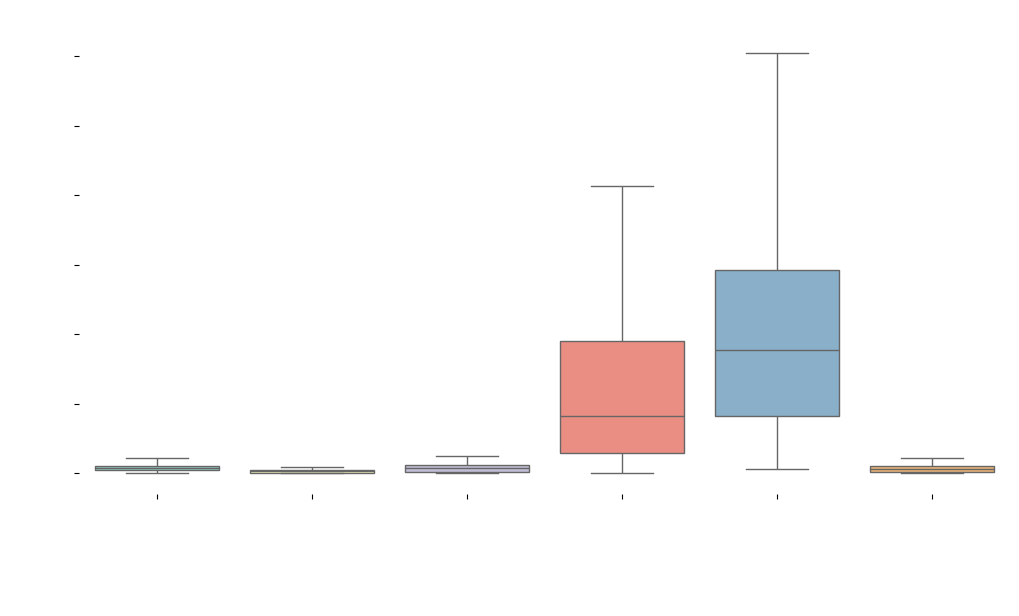

In [11]:
# parallèle entre la colonne "model_name" et "energy_consumption_llm_total" en statistiques visuelles
# ne prend pas en compte les outliers

plt.figure(figsize=(12, 6))

# Création de l'axe et suppression des fonds
ax = plt.gca()
fig = plt.gcf()
fig.patch.set_alpha(0.0)   # Fond de la figure transparent
ax.patch.set_alpha(0.0)    # Fond de l'axe transparent

# Boxplot sans outliers et fond transparent
sns.boxplot(
    data=data,
    x="model_name",
    y="energy_consumption_llm_total",
    palette="Set3",
    showfliers=False
)

# Mise en forme du texte
plt.title("Consommation énergétique totale par modèle", color="white")
plt.xlabel("Modèle", color="white")
plt.ylabel("Consommation énergétique totale (kWh)", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")

# Suppression de la bordure de fond
for spine in ax.spines.values():
    spine.set_visible(False)

# Affichage avec fond transparent
plt.show()

In [12]:
# consommation moyenne des model 
mean_energy_by_model = data.groupby("model_name")["energy_consumption_llm_total"].mean().reset_index()
mean_energy_by_model

,model_name,energy_consumption_llm_total
0,codellama:70b,0.004403
1,codellama:7b,0.000198
2,gemma:2b,0.000055
3,gemma:7b,0.000137
4,llama3:70b,0.002258
5,llama3:8b,0.000134


In [13]:
# consommation moyenne des devices
mean_energy_by_hardware = data.groupby("hardware")["energy_consumption_llm_total"].mean().reset_index()
mean_energy_by_hardware

,hardware,energy_consumption_llm_total
0,laptop1,0.000185
1,laptop2,0.000123
2,server,0.002258
3,workstation,0.000111


In [14]:
# consommation moyenne des model pour grand nombre de "response_token_length"
mean_energy_by_model_large_response = data[data["response_token_length"] > 1000].groupby("model_name")["energy_consumption_llm_total"].mean().reset_index()
mean_energy_by_model_large_response

,model_name,energy_consumption_llm_total
0,codellama:70b,0.017782
1,codellama:7b,0.001326
2,gemma:2b,0.000276
3,gemma:7b,0.000840
4,llama3:70b,0.009695
5,llama3:8b,0.000573


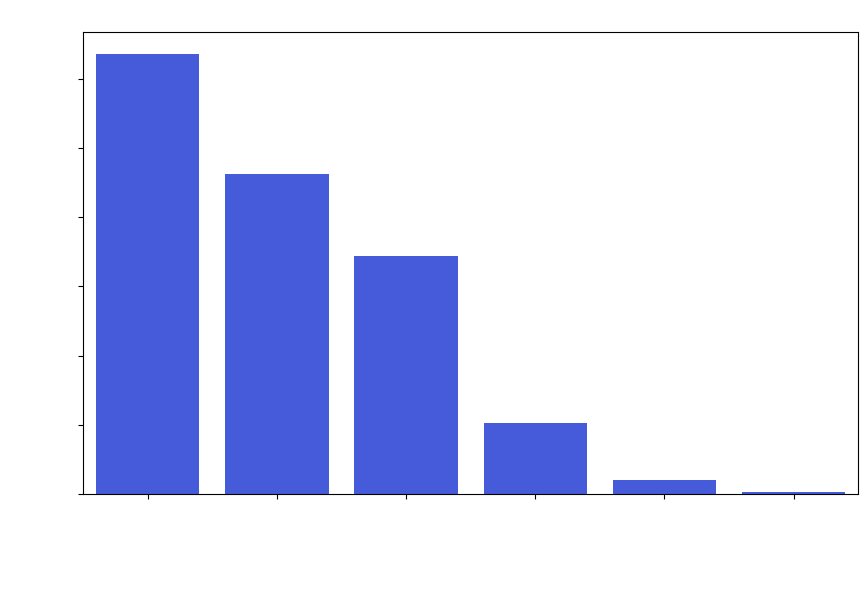

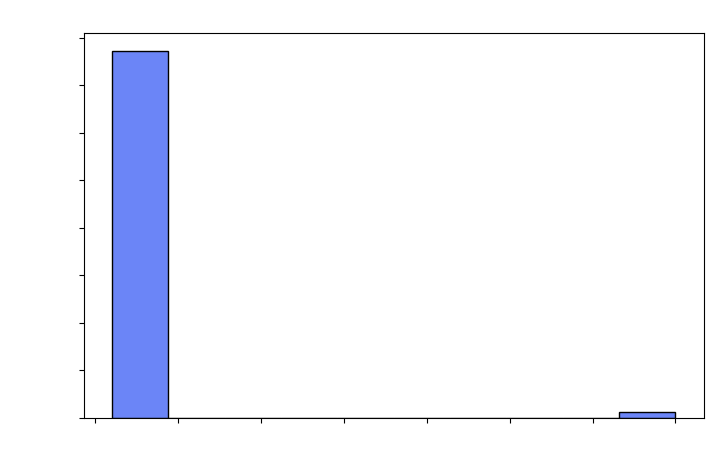

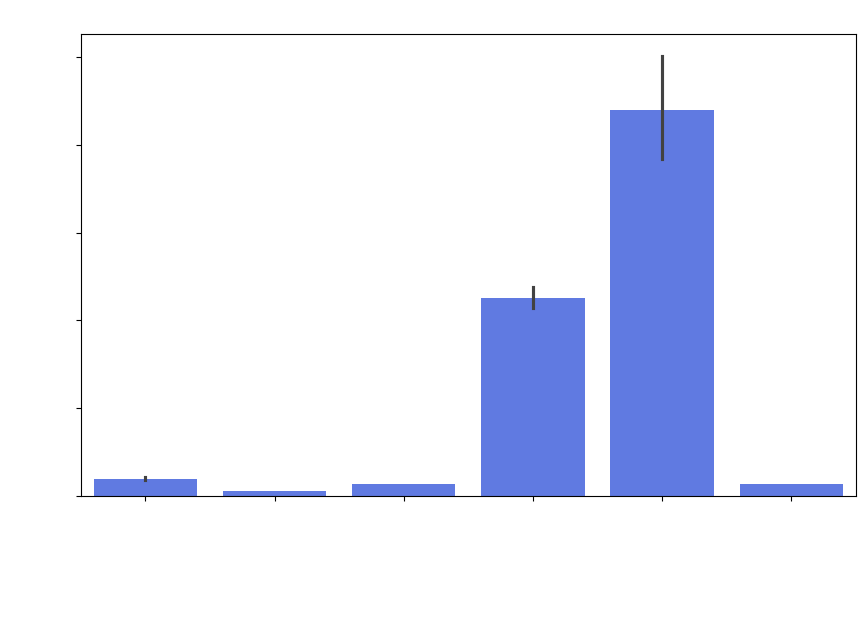

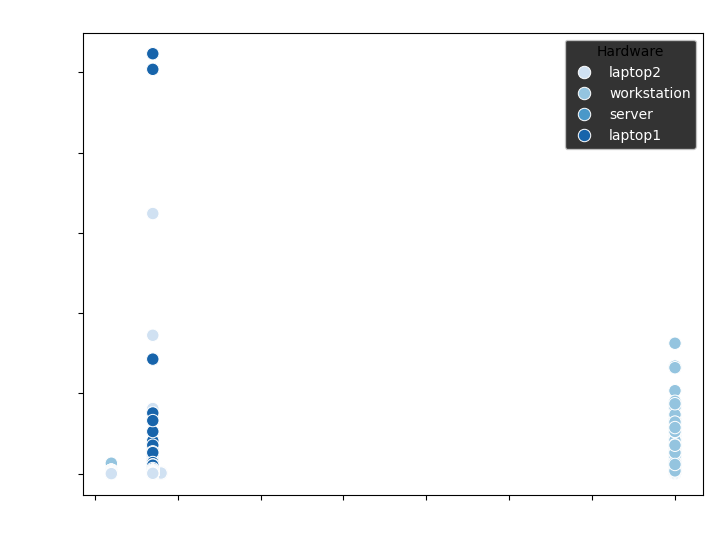

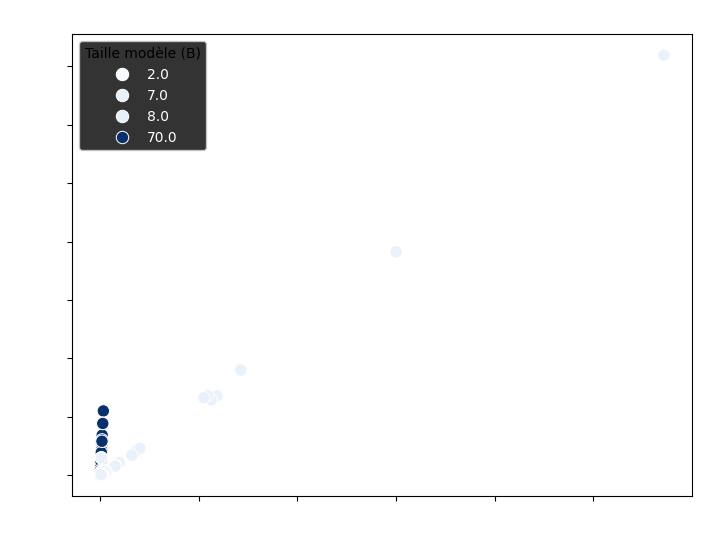


--- Statistiques descriptives par modèle ---

              energy_consumption_llm_total                                \
                                      mean       std       min       max   
model_name                                                                 
codellama:70b                     0.004403  0.003708  0.000130  0.022008   
codellama:7b                      0.000198  0.001378  0.000004  0.143786   
gemma:2b                          0.000055  0.000040  0.000005  0.000759   
gemma:7b                          0.000137  0.000097  0.000007  0.001175   
llama3:70b                        0.002258  0.001909  0.000008  0.009768   
llama3:8b                         0.000134  0.000102  0.000012  0.000720   

              total_duration_s                                       \
                          mean         std        min           max   
model_name                                                            
codellama:70b       649.994138  553.596656  12.786597  

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# Préparation des données
# -----------------------------
# Extraire le nom et la taille du modèle
data[["model_base", "model_size"]] = data["model_name"].str.split(":", expand=True)
data["model_size"] = data["model_size"].str.replace("b", "", case=False).astype(float)

# Conversion du temps de ns → secondes
data["total_duration_s"] = data["total_duration"] / 1e9

# Palette de bleus
palette_blues = sns.color_palette("Blues", as_cmap=False)

# -----------------------------
# Graphiques
# -----------------------------

# 1. Répartition des modèles
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.countplot(data=data, x="model_name", order=data["model_name"].value_counts().index, color="#2d4af3")
plt.title("Répartition des modèles", color="white")
plt.xlabel("Modèle", color="white")
plt.ylabel("Quantité", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.show()

# 2. Répartition des tailles de modèles
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.histplot(data=data, x="model_size", bins=10, color="#3a5df5")
plt.title("Distribution des tailles de modèles (en milliards de paramètres)", color="white")
plt.xlabel("Taille du modèle (B)", color="white")
plt.ylabel("Fréquence", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# 3. Énergie utilisée par modèle
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.barplot(data=data, x="model_name", y="energy_consumption_llm_total", estimator=np.mean, color="#4a6df7")
plt.title("Énergie moyenne utilisée par modèle", color="white")
plt.xlabel("Modèle", color="white")
plt.ylabel("Énergie (unités)", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.show()

# 4. Durée totale vs taille du modèle
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.scatterplot(data=data, x="model_size", y="total_duration_s", hue="hardware", palette="Blues", s=80)
plt.title("Temps de calcul (s) selon la taille du modèle et le hardware", color="white")
plt.xlabel("Taille du modèle (B)", color="white")
plt.ylabel("Durée totale (s)", color="white")
plt.legend(title="Hardware", facecolor="black", labelcolor="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# 5. Longueur de réponse vs énergie consommée
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.scatterplot(data=data, x="response_token_length", y="energy_consumption_llm_total", hue="model_size", palette="Blues", s=80)
plt.title("Énergie vs longueur de la réponse", color="white")
plt.xlabel("Longueur de la réponse (tokens)", color="white")
plt.ylabel("Énergie utilisée", color="white")
plt.legend(title="Taille modèle (B)", facecolor="black", labelcolor="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# 6. Statistiques descriptives par modèle
stats = data.groupby("model_name")[["energy_consumption_llm_total", "total_duration_s", "response_token_length"]].agg(["mean", "std", "min", "max"])
print("\n--- Statistiques descriptives par modèle ---\n")
print(stats)



=== Statistiques descriptives globales ===
         model_size  energy_consumption_llm_total  response_token_length  \
count  78425.000000                  78425.000000           78425.000000   
mean       5.991291                      0.000153             283.876532   
std        8.322114                      0.000772            1300.328747   
min        2.000000                      0.000004               1.000000   
25%        2.000000                      0.000031              66.000000   
50%        7.000000                      0.000083             256.000000   
75%        7.000000                      0.000172             416.000000   
max       70.000000                      0.143786          285702.000000   

       total_duration_s  energy_per_token  tokens_per_second  
count      78425.000000      7.842500e+04       78425.000000  
mean          27.353760      6.348256e-07          37.698481  
std           98.715203      1.381701e-06          33.627482  
min            0.20

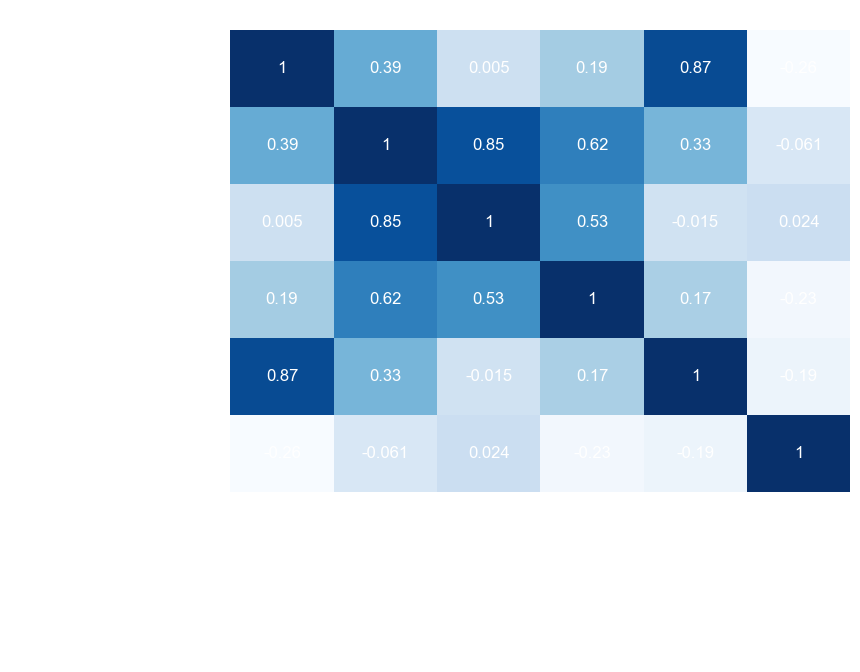

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21152\2502642671.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="hardware", y="energy_consumption_llm_total", palette="Blues", showfliers=False)


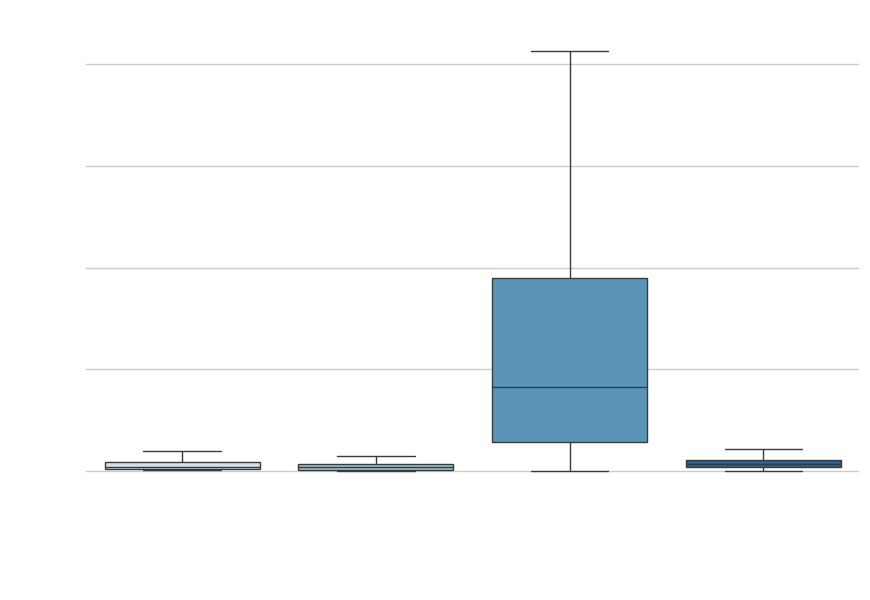


=== Statistiques par hardware ===
            energy_consumption_llm_total                                \
                                    mean       std       min       max   
hardware                                                                 
laptop1                         0.000185  0.000557  0.000004  0.027288   
laptop2                         0.000123  0.001015  0.000011  0.143786   
server                          0.002258  0.001909  0.000008  0.009768   
workstation                     0.000111  0.000422  0.000005  0.027156   

            total_duration_s                                      \
                        mean         std       min           max   
hardware                                                           
laptop1            80.701767  213.670236  1.573804  10464.144024   
laptop2             5.179289   45.774578  0.206272   6482.353192   
server             79.790549   67.178671  2.024598    351.289050   
workstation        26.968461   66.0604

KeyboardInterrupt: 

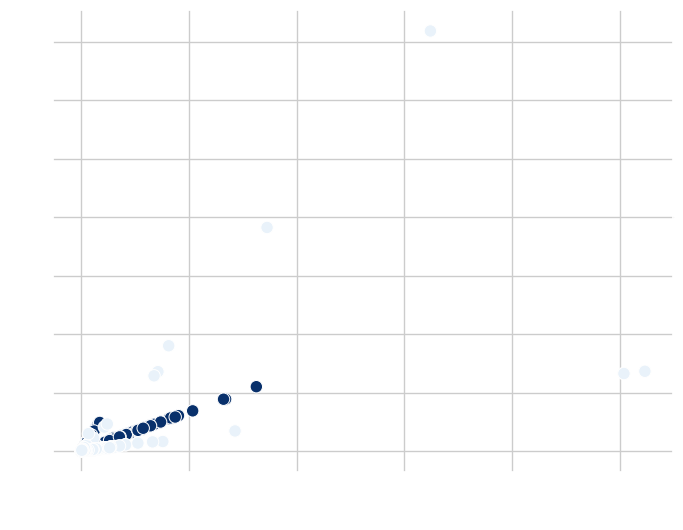

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# --------------------------------------------------------------------
# Préparation des données
# --------------------------------------------------------------------
data[["model_base", "model_size"]] = data["model_name"].str.split(":", expand=True)
data["model_size"] = data["model_size"].str.replace("b", "", case=False).astype(float)
data["total_duration_s"] = data["total_duration"] / 1e9

# Ratios et métriques dérivées
data["energy_per_token"] = data["energy_consumption_llm_total"] / data["response_token_length"]
data["energy_per_second"] = data["energy_consumption_llm_total"] / data["total_duration_s"]
data["tokens_per_second"] = data["response_token_length"] / data["total_duration_s"]

# --------------------------------------------------------------------
# Style graphique global
# --------------------------------------------------------------------
sns.set(style="whitegrid")
plt.rcParams["axes.facecolor"] = (0, 0, 0, 0)
plt.rcParams["figure.facecolor"] = (0, 0, 0, 0)
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"
plt.rcParams["axes.edgecolor"] = "white"

# Palette bleue personnalisée
palette_blues = sns.color_palette("Blues_r")

# --------------------------------------------------------------------
# 1. Statistiques globales avancées
# --------------------------------------------------------------------
print("\n=== Statistiques descriptives globales ===")
desc = data[["model_size", "energy_consumption_llm_total", "response_token_length", 
             "total_duration_s", "energy_per_token", "tokens_per_second"]].describe()
print(desc)

# Coefficient de variation (std / mean)
cv = data[["energy_consumption_llm_total", "response_token_length", "total_duration_s"]].std() / \
     data[["energy_consumption_llm_total", "response_token_length", "total_duration_s"]].mean()
print("\n=== Coefficient de variation (std / mean) ===")
print(cv)

# --------------------------------------------------------------------
# 2. Corrélations
# --------------------------------------------------------------------
corr = data[["model_size", "energy_consumption_llm_total", "response_token_length", 
             "total_duration_s", "energy_per_token", "tokens_per_second"]].corr(method="pearson")

print("\n=== Corrélations (Pearson) ===")
print(corr)

# Heatmap des corrélations
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.heatmap(corr, annot=True, cmap="Blues", cbar=False, annot_kws={"color":"white"})
plt.title("Heatmap des corrélations", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(rotation=0, color="white")
plt.show()

# --------------------------------------------------------------------
# 3. Analyse par hardware
# --------------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.boxplot(data=data, x="hardware", y="energy_consumption_llm_total", palette="Blues", showfliers=False)
plt.title("Distribution de l'énergie utilisée selon le hardware", color="white")
plt.xlabel("Hardware", color="white")
plt.ylabel("Énergie totale", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.show()

# Moyennes et écarts par hardware
hardware_stats = data.groupby("hardware")[["energy_consumption_llm_total", "total_duration_s", "tokens_per_second"]].agg(["mean", "std", "min", "max"])
print("\n=== Statistiques par hardware ===")
print(hardware_stats)

# --------------------------------------------------------------------
# 4. Relations entre variables
# --------------------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.scatterplot(data=data, x="total_duration_s", y="energy_consumption_llm_total",
                hue="model_size", palette="Blues", s=80)
plt.title("Relation entre durée de calcul et énergie consommée", color="white")
plt.xlabel("Durée totale (s)", color="white")
plt.ylabel("Énergie utilisée", color="white")
plt.legend(title="Taille modèle (B)", facecolor="black", labelcolor="white")
plt.show()

# --------------------------------------------------------------------
# 5. Tests de corrélation statistique
# --------------------------------------------------------------------
pear_corr, pear_p = pearsonr(data["total_duration_s"], data["energy_consumption_llm_total"])
spear_corr, spear_p = spearmanr(data["total_duration_s"], data["energy_consumption_llm_total"])

print("\n=== Tests de corrélation ===")
print(f"Pearson corr(duration, energy) = {pear_corr:.3f} (p={pear_p:.3e})")
print(f"Spearman corr(duration, energy) = {spear_corr:.3f} (p={spear_p:.3e})")

# --------------------------------------------------------------------
# 6. Rapport énergie/token par modèle
# --------------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.barplot(data=data, x="model_name", y="energy_per_token", color="#3b5ef5")
plt.title("Énergie moyenne par token selon le modèle", color="white")
plt.xlabel("Modèle", color="white")
plt.ylabel("Énergie par token", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.show()

# --------------------------------------------------------------------
# 7. Scatterplot 3D (optionnel si tu veux une vue multidimensionnelle)
# --------------------------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["model_size"], data["total_duration_s"], data["energy_consumption_llm_total"],
           c=data["model_size"], cmap="Blues", s=60)
ax.set_xlabel("Taille modèle (B)", color="white")
ax.set_ylabel("Durée (s)", color="white")
ax.set_zlabel("Énergie", color="white")
ax.set_title("Vue 3D : Taille modèle / Durée / Énergie", color="white")
fig.patch.set_alpha(0.0)
ax.set_facecolor((0,0,0,0))
plt.show()


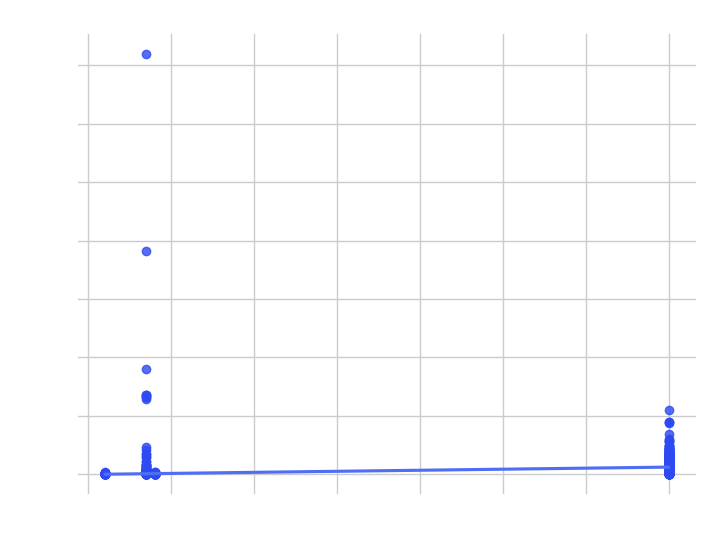

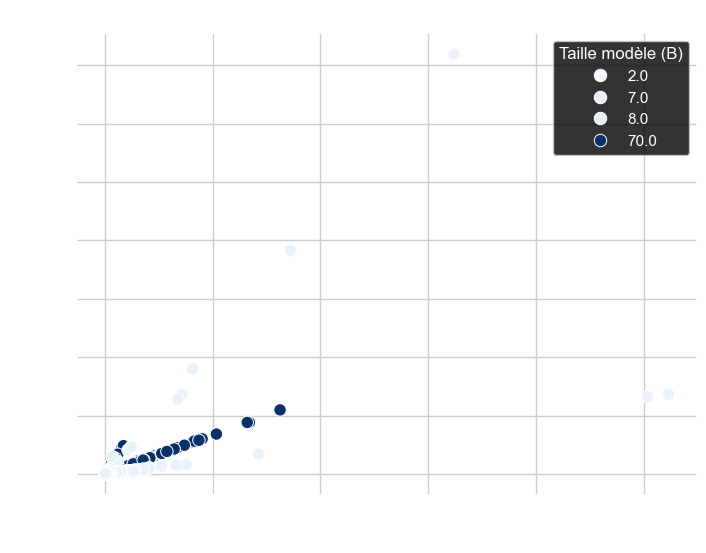

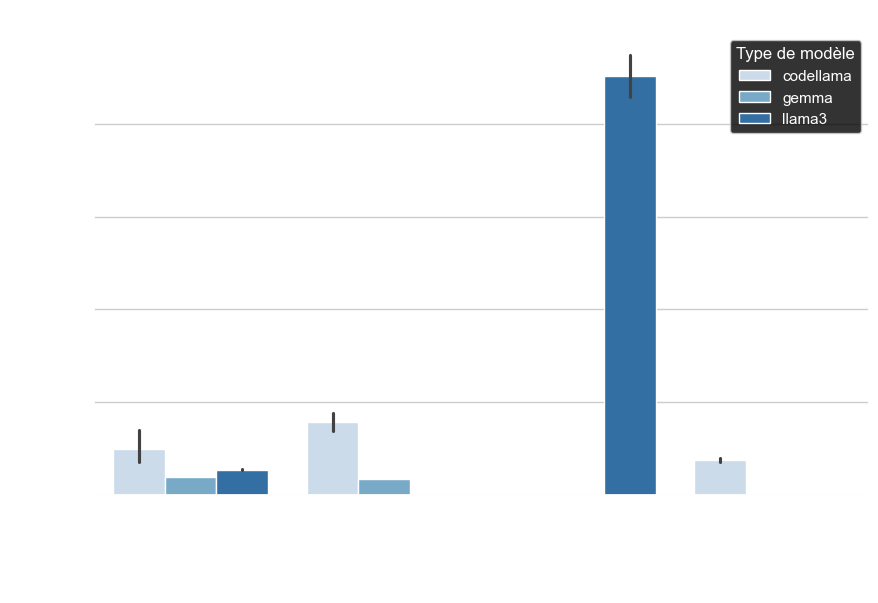

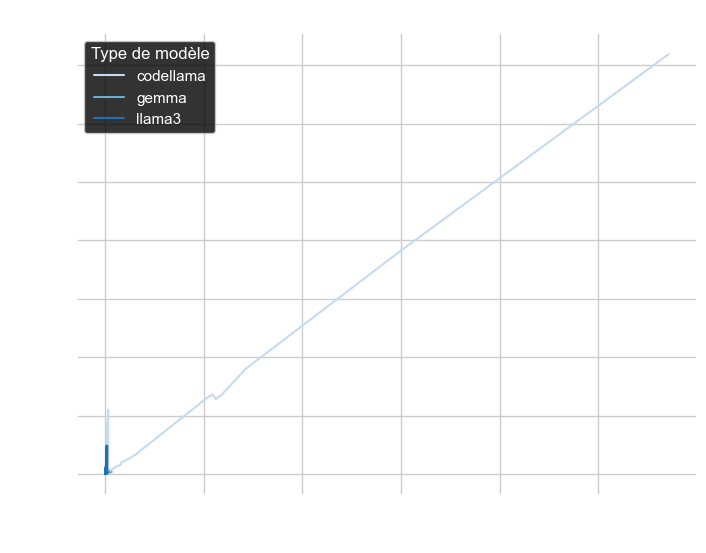

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12980\1572433854.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="model_size", y="energy_consumption_llm_total", palette="Blues")


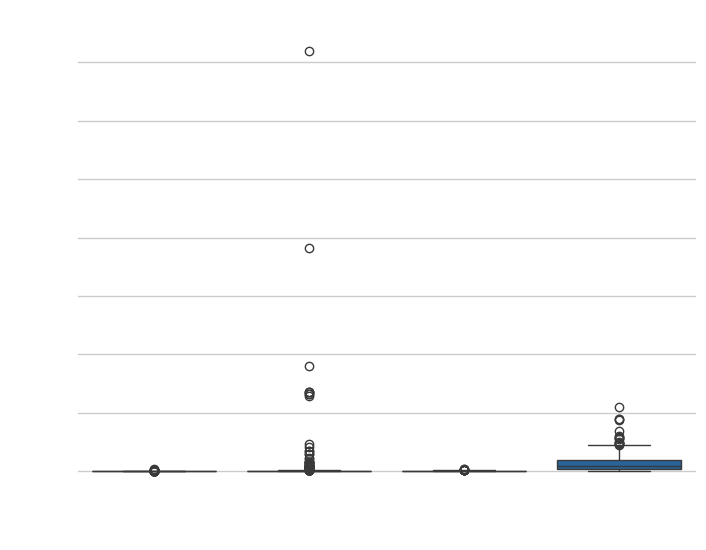

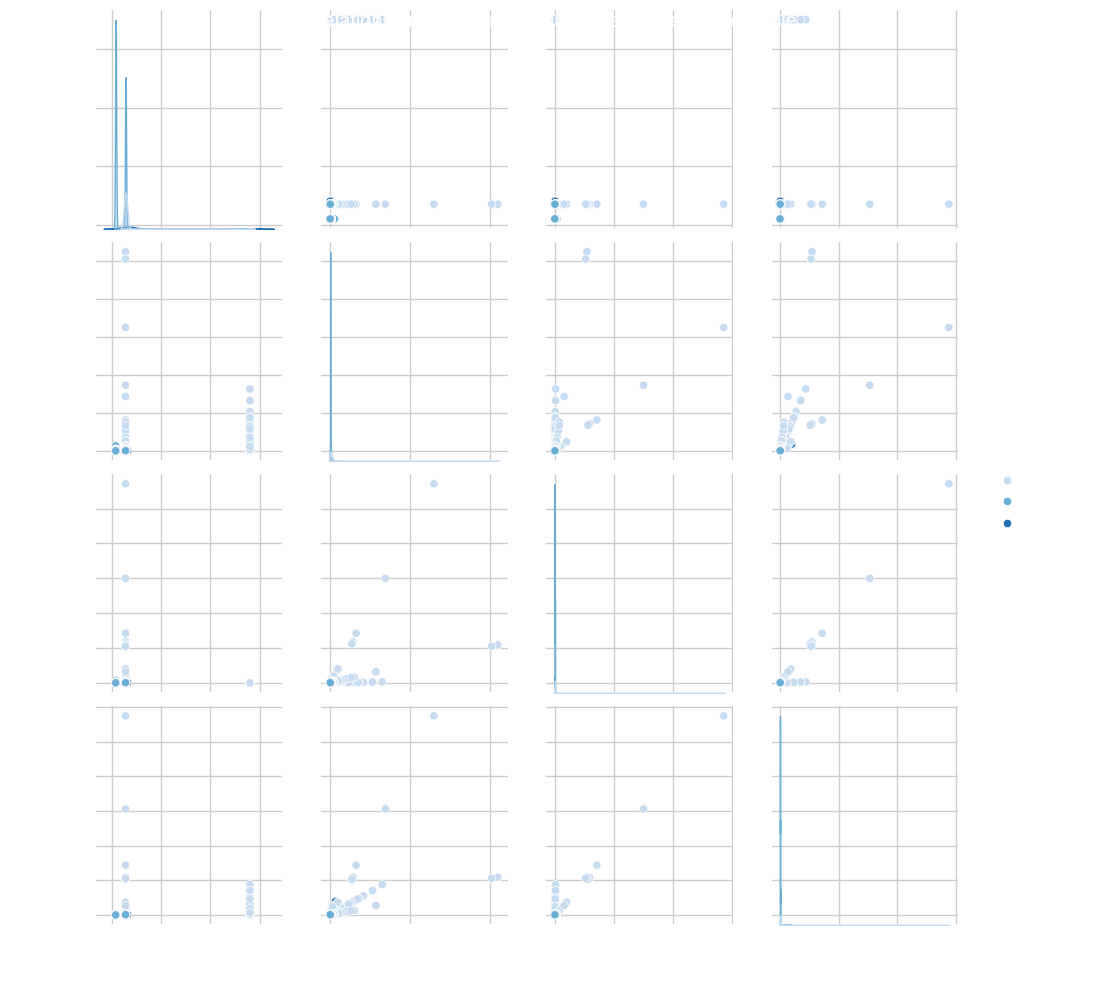

ValueError: Contour levels must be increasing

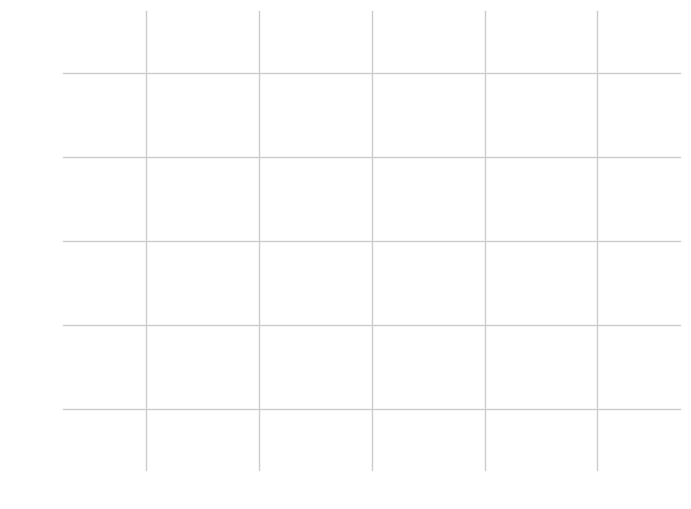

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------------------------------------------
# Préparation
# ----------------------------------------------------------
data[["model_base", "model_size"]] = data["model_name"].str.split(":", expand=True)
data["model_size"] = data["model_size"].str.replace("b", "", case=False).astype(float)
data["total_duration_s"] = data["total_duration"] / 1e9

# Palette et style
sns.set(style="whitegrid")
plt.rcParams["axes.facecolor"] = (0, 0, 0, 0)
plt.rcParams["figure.facecolor"] = (0, 0, 0, 0)
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"
plt.rcParams["axes.edgecolor"] = "white"
palette_blues = sns.color_palette("Blues_r")

# ----------------------------------------------------------
# 1️⃣ Énergie vs taille du modèle
# ----------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.regplot(data=data, x="model_size", y="energy_consumption_llm_total", scatter_kws={"color":"#2d4af3"}, line_kws={"color":"#4f6ef5"})
plt.title("Énergie utilisée en fonction de la taille du modèle", color="white")
plt.xlabel("Taille du modèle (B)", color="white")
plt.ylabel("Énergie totale", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# ----------------------------------------------------------
# 2️⃣ Énergie vs durée totale
# ----------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.scatterplot(data=data, x="total_duration_s", y="energy_consumption_llm_total", hue="model_size", palette="Blues", s=80)
plt.title("Énergie consommée selon la durée d’exécution", color="white")
plt.xlabel("Durée totale (s)", color="white")
plt.ylabel("Énergie totale", color="white")
plt.legend(title="Taille modèle (B)", facecolor="black", labelcolor="white")
plt.show()

# ----------------------------------------------------------
# 3️⃣ Énergie moyenne par hardware et par type de modèle
# ----------------------------------------------------------
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.barplot(data=data, x="hardware", y="energy_consumption_llm_total", hue="model_base", estimator=np.mean, palette="Blues")
plt.title("Énergie moyenne selon le hardware et le type de modèle", color="white")
plt.xlabel("Hardware", color="white")
plt.ylabel("Énergie moyenne", color="white")
plt.legend(title="Type de modèle", facecolor="black", labelcolor="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.show()

# ----------------------------------------------------------
# 4️⃣ Évolution de l’énergie en fonction du nombre de tokens
# ----------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.lineplot(data=data, x="response_token_length", y="energy_consumption_llm_total", hue="model_base", palette="Blues")
plt.title("Énergie consommée en fonction de la longueur de la réponse", color="white")
plt.xlabel("Longueur de la réponse (tokens)", color="white")
plt.ylabel("Énergie totale", color="white")
plt.legend(title="Type de modèle", facecolor="black", labelcolor="white")
plt.show()

# ----------------------------------------------------------
# 5️⃣ Boxplot comparatif : taille du modèle vs énergie
# ----------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.boxplot(data=data, x="model_size", y="energy_consumption_llm_total", palette="Blues")
plt.title("Distribution de l’énergie par taille de modèle", color="white")
plt.xlabel("Taille modèle (B)", color="white")
plt.ylabel("Énergie totale", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# ----------------------------------------------------------
# 6️⃣ Comparaison multi-facteurs : pairplot
# ----------------------------------------------------------
fig = sns.pairplot(
    data=data,
    vars=["model_size", "total_duration_s", "response_token_length", "energy_consumption_llm_total"],
    hue="model_base",
    palette="Blues",
    diag_kind="kde"
)
fig.fig.patch.set_alpha(0.0)
for ax in fig.axes.flatten():
    if ax is not None:
        ax.set_facecolor((0,0,0,0))
        ax.tick_params(colors="white")
        for spine in ax.spines.values():
            spine.set_edgecolor("white")
fig.fig.suptitle("Relations croisées entre taille, durée, tokens et énergie", color="white")
plt.show()

# ----------------------------------------------------------
# 7️⃣ Densité conjointe énergie/durée
# ----------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.kdeplot(data=data, x="total_duration_s", y="energy_consumption_llm_total", fill=True, cmap="Blues")
plt.title("Densité conjointe : durée vs énergie", color="white")
plt.xlabel("Durée (s)", color="white")
plt.ylabel("Énergie totale", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# ----------------------------------------------------------
# 8️⃣ Statistiques de corrélation pour interprétation
# ----------------------------------------------------------
corr_matrix = data[["model_size", "total_duration_s", "response_token_length", "energy_consumption_llm_total"]].corr()
print("\n=== Matrice de corrélation ===\n")
print(corr_matrix)

# ----------------------------------------------------------
# 9️⃣ Analyse combinée : moyenne énergie par taille et hardware
# ----------------------------------------------------------
energy_summary = data.groupby(["model_size", "hardware"])["energy_consumption_llm_total"].mean().reset_index()
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.barplot(data=energy_summary, x="model_size", y="energy_consumption_llm_total", hue="hardware", palette="Blues")
plt.title("Énergie moyenne par taille de modèle et hardware", color="white")
plt.xlabel("Taille du modèle (B)", color="white")
plt.ylabel("Énergie moyenne", color="white")
plt.legend(title="Hardware", facecolor="black", labelcolor="white")
plt.show()
